In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/My Drive/merged_dataset_dachealthcare.csv')
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,Entity,Code,Day,Pfizer/BioNTech,Moderna,Oxford/AstraZeneca,Johnson&Johnson,Sputnik V,Sinovac,Sinopharm/Beijing,CanSino
0,AUT,Europe,Austria,2021-01-08,376793.0,2063.0,6641.0,73.0,NaN,NaN,tests performed,24739.0,24739.0,NaN,NaN,13296.0,9043072.0,Austria,AUT,2021-01-08,31523,0,0,0,0,0,0,0
1,AUT,Europe,Austria,2021-01-15,390788.0,1528.0,6987.0,66.0,NaN,NaN,tests performed,104393.0,104389.0,4.0,NaN,18657.0,9043072.0,Austria,AUT,2021-01-15,116861,94,0,0,0,0,0,0
2,AUT,Europe,Austria,2021-01-22,401886.0,2088.0,7330.0,42.0,NaN,NaN,tests performed,210517.0,205531.0,4984.0,2.0,11678.0,9043072.0,Austria,AUT,2021-01-22,214527,332,0,0,0,0,0,0
3,AUT,Europe,Austria,2021-01-29,411730.0,1500.0,7658.0,51.0,NaN,NaN,tests performed,258906.0,239749.0,19155.0,2.0,15282.0,9043072.0,Austria,AUT,2021-01-29,259636,4324,0,0,0,0,0,0
4,AUT,Europe,Austria,2021-02-05,421189.0,1388.0,7973.0,37.0,0.0121,82.5,tests performed,347942.0,256700.0,91235.0,7.0,21571.0,9043072.0,Austria,AUT,2021-02-05,355977,6036,0,0,0,0,0,0
5,AUT,Europe,Austria,2021-02-12,430870.0,1731.0,8170.0,32.0,0.0066,151.7,tests performed,466716.0,282932.0,183776.0,8.0,27178.0,9043072.0,Austria,AUT,2021-02-12,458112,10154,10805,0,0,0,0,0
6,AUT,Europe,Austria,2021-02-19,441659.0,1818.0,8348.0,36.0,0.0073,137.5,tests performed,563328.0,335187.0,228123.0,18.0,21691.0,9043072.0,Austria,AUT,2021-02-19,524249,14315,43640,0,0,0,0,0
7,AUT,Europe,Austria,2021-02-26,454860.0,2093.0,8515.0,22.0,0.0086,116.7,tests performed,675088.0,425997.0,249074.0,18.0,29763.0,9043072.0,Austria,AUT,2021-02-26,585847,22788,101581,1,0,0,0,0
8,AUT,Europe,Austria,2021-03-05,470314.0,2668.0,8669.0,17.0,0.0091,109.4,tests performed,839829.0,576356.0,263457.0,18.0,37712.0,9043072.0,Austria,AUT,2021-03-05,690854,32166,156702,4,0,0,0,0
9,AUT,Europe,Austria,2021-03-12,488042.0,3126.0,8831.0,33.0,0.0099,100.6,tests performed,1054905.0,767526.0,287366.0,19.0,59290.0,9043072.0,Austria,AUT,2021-03-12,854539,47596,235746,6,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332 entries, 0 to 7331
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 7332 non-null   object 
 1   continent                6938 non-null   object 
 2   location                 7332 non-null   object 
 3   date                     7332 non-null   object 
 4   total_cases              7332 non-null   float64
 5   new_cases                7331 non-null   float64
 6   total_deaths             7332 non-null   float64
 7   new_deaths               7330 non-null   float64
 8   positive_rate            6209 non-null   float64
 9   tests_per_case           6208 non-null   float64
 10  tests_units              6871 non-null   object 
 11  total_vaccinations       6912 non-null   float64
 12  people_vaccinated        6758 non-null   float64
 13  people_fully_vaccinated  6666 non-null   float64
 14  total_boosters          

In [ ]:
data.describe()

,total_cases,new_cases,total_deaths,new_deaths,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,Pfizer/BioNTech,Moderna,Oxford/AstraZeneca,Johnson&Johnson,Sputnik V,Sinovac,Sinopharm/Beijing,CanSino
count,7.332000e+03,7.331000e+03,7332.000000,7330.000000,6209.000000,6208.000000,6.912000e+03,6.758000e+03,6.666000e+03,4.193000e+03,6.838000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7332.000000
mean,5.180963e+06,2.117587e+04,106545.844517,222.246248,0.085306,84.661614,5.561099e+07,3.027266e+07,2.508636e+07,4.625334e+06,3.218961e+05,6.599577e+07,3.403951e+07,9.774490e+06,4.594854e+06,1.264022e+06,7.954950e+04,1.446984e+06,4.166376e+05,22926.783142
std,1.127713e+07,8.114207e+04,200753.406685,548.805813,0.087341,930.323521,1.254531e+08,6.488559e+07,5.736259e+07,1.704803e+07,6.715389e+05,1.150523e+08,8.129436e+07,3.004878e+07,1.211969e+07,3.584330e+06,3.638736e+05,4.296655e+06,2.140001e+06,104046.568352
min,2.612000e+03,-2.214000e+03,37.000000,-679.000000,0.000000,2.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.825400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.711350e+05,5.175000e+02,5917.500000,4.000000,0.021100,8.800000,1.853835e+06,1.193476e+06,8.080470e+05,6.400000e+01,1.536300e+04,7.552800e+06,9.879218e+05,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.104652e+06,2.222000e+03,29375.000000,34.000000,0.056200,17.800000,9.485875e+06,5.037632e+06,4.448498e+06,1.084100e+04,6.243200e+04,1.912777e+07,5.133635e+06,2.655590e+05,4.316570e+05,3.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,3.225651e+06,9.563500e+03,97701.250000,144.000000,0.113700,47.425000,3.914963e+07,2.319107e+07,1.593805e+07,1.318487e+06,2.710745e+05,6.036747e+07,1.890816e+07,3.176018e+06,2.505705e+06,4.292148e+05,0.000000e+00,9.000000e+00,0.000000e+00,0.000000
max,7.860150e+07,1.400250e+06,943421.000000,5019.000000,0.504000,50000.000000,8.073479e+08,3.318509e+08,3.163995e+08,1.846770e+08,6.586453e+06,4.471899e+08,5.526238e+08,2.032356e+08,6.735482e+07,1.830479e+07,1.845079e+06,2.493844e+07,1.938986e+07,573979.000000


## Total Vaccination Count

In [ ]:
pfizer_vaccinated = data['Pfizer/BioNTech'].sum()
moderna_vaccinated = data['Pfizer/BioNTech'].sum()
astrazeneca_vaccinated = data['Oxford/AstraZeneca'].sum()
johnsonNJohnson_vaccinated = data['Johnson&Johnson'].sum()
sputnik_vaccinated = data['Sputnik V'].sum()
sinovac_vaccinated = data['Sinovac'].sum()
sinopharm_vaccinated = data['Sinopharm/Beijing'].sum()
cansino_vaccinated = data['CanSino'].sum()

In [ ]:
vaccine_dict = {'Pfizer' : pfizer_vaccinated, 
                'Moderna' : moderna_vaccinated, 
                'AstraZeneca' : astrazeneca_vaccinated, 
                'Johnson&Johnson' : johnsonNJohnson_vaccinated, 
                'Sputnik V' : sputnik_vaccinated, 
                'Sinovac' : sinovac_vaccinated,
                'Sinopharm' : sinopharm_vaccinated,
                'CanSino' : cansino_vaccinated}

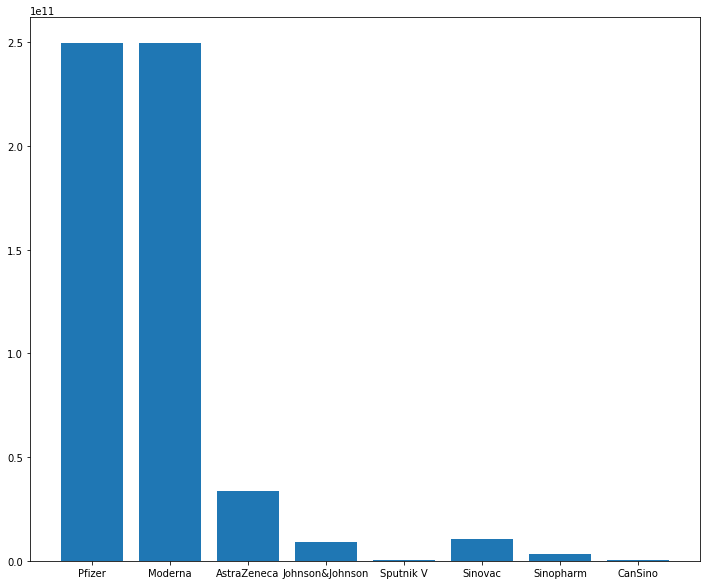

In [ ]:
x_axis = vaccine_dict.keys()
f = operator.itemgetter(*x_axis)
y_axis = f(vaccine_dict)

plt.figure(figsize=(12,10))
plt.bar(x_axis, y_axis)
plt.xticks(range(len(x_axis)),x_axis)
plt.show()

In [ ]:
vaccines_sum = pd.DataFrame(vaccine_dict.items(), columns = ['Vaccine', 'Total Vaccinated'])
vaccines_sum

,Vaccine,Total Vaccinated
0,Pfizer,249577721107
1,Moderna,249577721107
2,AstraZeneca,33689468494
3,Johnson&Johnson,9267812245
4,Sputnik V,583256931
5,Sinovac,10609283467
6,Sinopharm,3054786676
7,CanSino,168099174


In [ ]:
for()